# ========================================================================================
# 2m_project_5
# ========================================================================================

In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.  
Вопрос: сколько в датасете пропущенных значений?

In [2]:
data = pd.read_csv(r'F:\!PR\Simulation\data\5_transaction_data.csv', encoding='Windows-1251', sep=',')

In [2]:
data = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\5_transaction_data.csv', encoding='Windows-1251', sep=',')

In [3]:
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [5]:
data.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.  
Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [6]:
tranc_vc = data.transaction.value_counts()

In [ ]:
sns.barplot(x=tranc_vc.index, y=tranc_vc.values)

[Text(0, 0, '3692'), Text(0, 0, '1619'), Text(0, 0, '4')]

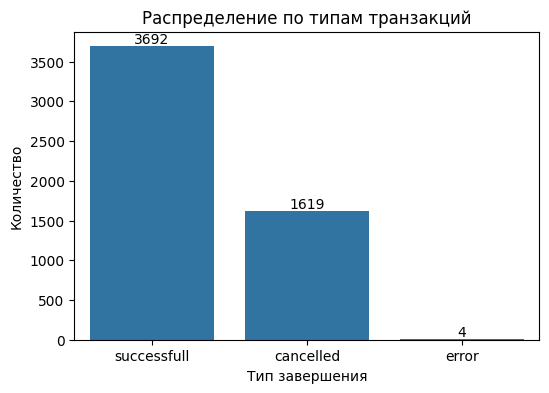

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=tranc_vc.index, y=tranc_vc.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])


Сколько произошло ошибок?

In [10]:
tranc_vc['error']

np.int64(4)

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull  
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где  
•	по оси x – число транзакций  
•	по оси y – доля пользователей с таким числом транзакций  

In [19]:
success_per_user = data.loc[data.transaction == 'successfull'].groupby('name', as_index=False).size()

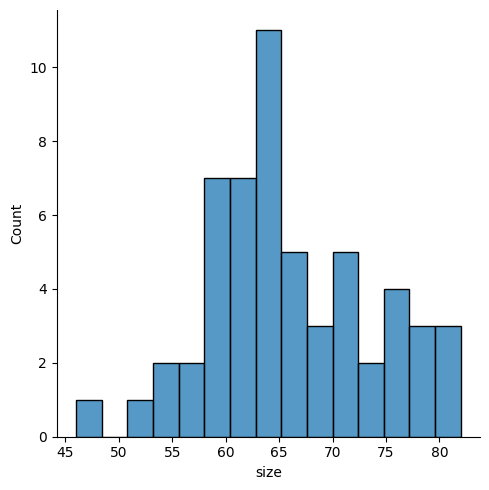

In [23]:
sns.displot(success_per_user, x='size', bins=15)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:  
•	столбцы – имена пользователей  
•	строки – минута времени осуществления операции (minute)  
•	значения – число совершённых операций  
Пропущенные значения заполните нулями.  
Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [6]:
df = pd.read_csv(r'F:\!PR\Simulation\data\5_transaction_data_updated.csv', parse_dates=['date'], encoding='Windows-1251', sep=',')

In [7]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


In [9]:
df.describe(include='all')

,date,name,transaction,minute
count,5315,5315,5315,5315.000000
unique,NaN,56,3,NaN
top,NaN,Masha_Ozerova,successfull,NaN
freq,NaN,112,3692,NaN
mean,2020-03-02 00:43:56.628974592,NaN,NaN,24.622389
min,2020-03-02 00:00:00,NaN,NaN,0.000000
25%,2020-03-02 00:21:50.500000,NaN,NaN,11.000000
50%,2020-03-02 00:43:26,NaN,NaN,22.000000
75%,2020-03-02 01:06:22.500000,NaN,NaN,37.000000
max,2020-03-02 01:29:05,NaN,NaN,59.000000


In [ ]:
df.groupby(['name', 'minute'], as_index=False)\
    .agg(transaction_count=('transaction', 'count'))\
    .pivot(index='minute', columns='name', values='transaction_count')\
    .fillna(0)

In [ ]:
df.groupby(['name', 'minute'], as_index=False)\
    .size()\
    .pivot(index='minute', columns='name', values='size')\
    .fillna(0)

Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [70]:
df['true_minute'] = df['date'].dt.hour * 60 + df['date'].dt.minute

In [74]:
tnwmd = df.groupby(['minute'], as_index=False)\
    .size()

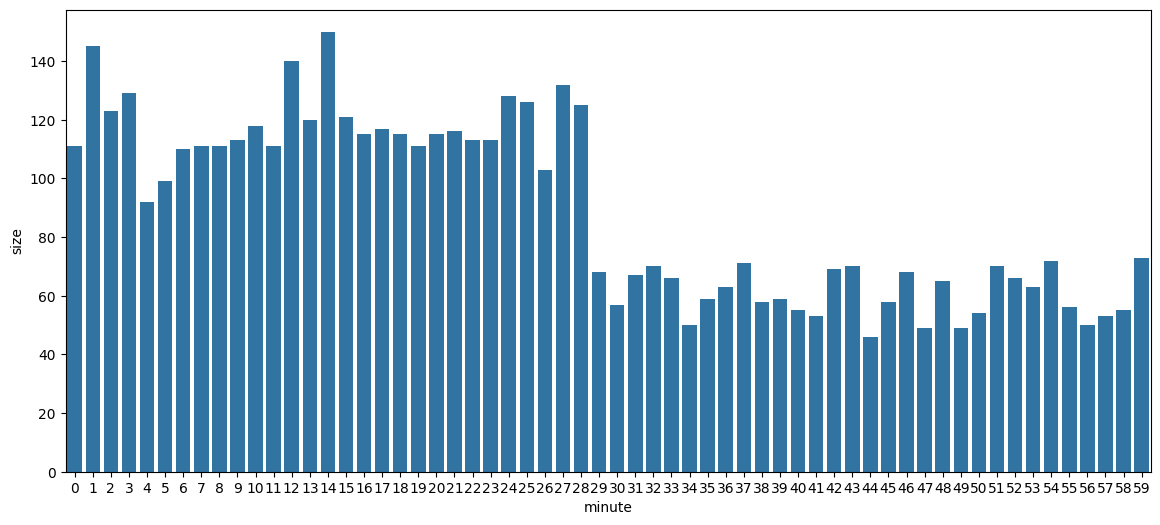

In [75]:
plt.figure(figsize=(14, 6)) 
ax = sns.barplot(x='minute', y="size", data=tnwmd.reset_index())

In [76]:
tnwmd_2 = df.groupby(['true_minute'], as_index=False)\
    .size()

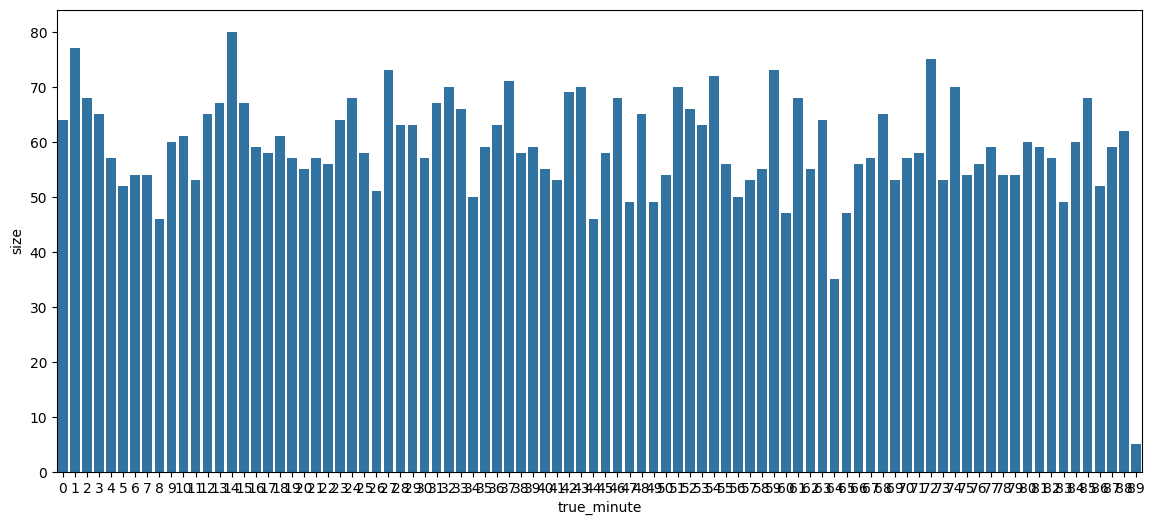

In [78]:
plt.figure(figsize=(14, 6)) 
ax = sns.barplot(x='true_minute', y="size", data=tnwmd_2.reset_index())

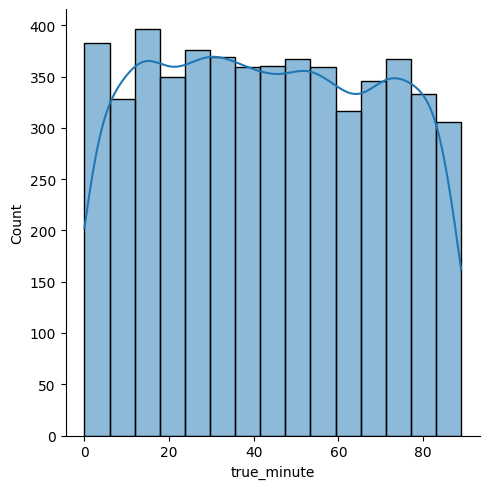

In [81]:
sns.displot(df, x='true_minute', bins=15, kde=True)